In [68]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from bs4 import BeautifulSoup
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
from datetime import datetime
import time
import pandas as pd
import cx_Oracle

from IPython import display

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

<html ciq-last-interaction="mouse"><head>
<title>11,910 SOL/KRW</title>
<meta content="디지털 자산, 비트코인, 이더리움, 리플, 에이다, 솔라나 등 알트코인 거래." name="description"/>
<meta content="web, software, mobile, app, upbit, 업빗, 업비트, bitcoin, 비트코인, 디지털, 자산" name="keywords"/>
<meta content="/exchange?code=CRIX.UPBIT.KRW-SOL" property="og:url"/>
<meta content="업비트 - 가장 신뢰받는 디지털 자산 거래소" property="og:site_name"/>
<meta content="업비트" property="og:title"/>
<meta content="https://static.upbit.com/upbit-pc/seo/upbit_facebook.png" property="og:image"/>
<meta content="1200" property="og:image:width"/>
<meta content="627" property="og:image:height"/>
<meta content="디지털 자산, 비트코인, 이더리움, 리플, 에이다, 솔라나 등 알트코인 거래." property="og:description"/>
<meta content="ko_kr" property="og:locale"/>
<meta content="website" property="og:type"/>
<meta content="summary" name="twitter:card"/>
<meta content="/exchange?code=CRIX.UPBIT.KRW-SOL" name="twitter:url"/>
<meta content="업비트 - 가장 신뢰받는 디지털 자산 거래소" name="twitter:site_name"/>
<meta conte
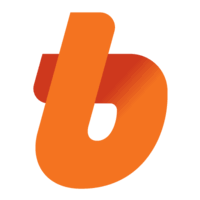
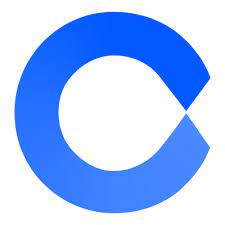
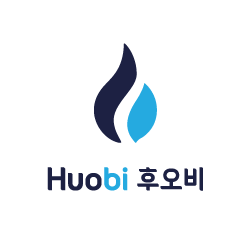
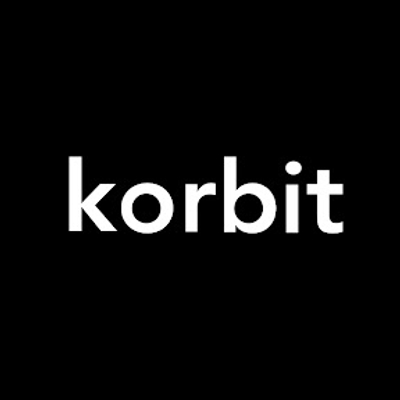
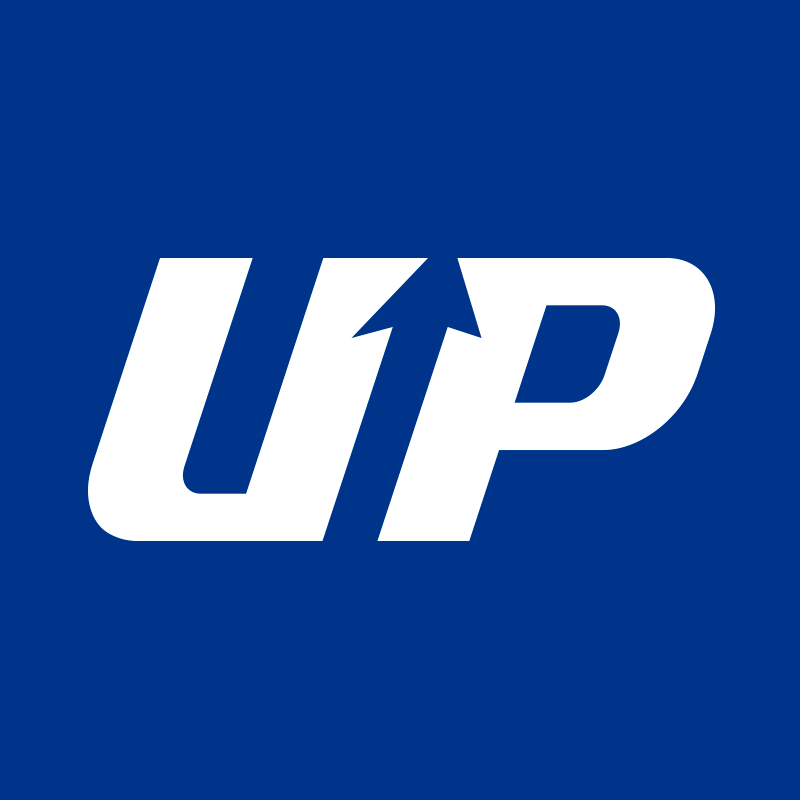

In [3]:
soup=BeautifulSoup(html,'html.parser')
a = soup.select_one("span.first strong").string
a

In [24]:
p = soup.findAll('span', attrs={'class':'first'})
p

a = soup.select_one("span.first strong").string
a

'11,910'

In [25]:
a = a.replace(',','')
a

'11910'

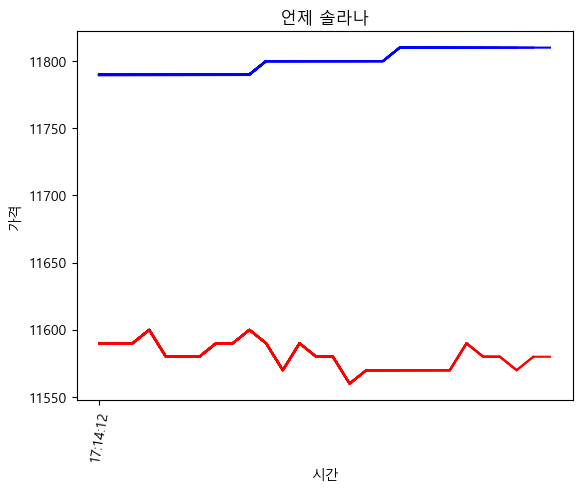

KeyboardInterrupt: 

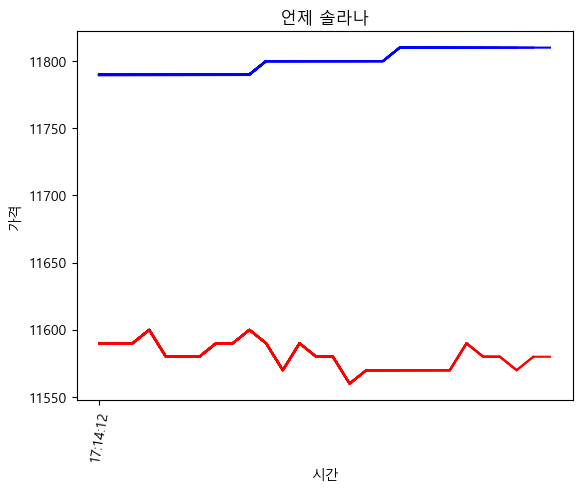

In [78]:
sol_url = 'https://upbit.com/exchange?code=CRIX.UPBIT.KRW-SOL'
sol_driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
sol_driver.maximize_window()
sol_driver.implicitly_wait(3) 

#     URL 접근
sol_driver.get(sol_url)
sol_driver.implicitly_wait(10)

sol_df = pd.DataFrame(columns={'시간','가격'})

eth_url = 'https://upbit.com/exchange?code=CRIX.UPBIT.KRW-ATOM'
eth_driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
eth_driver.maximize_window()
eth_driver.implicitly_wait(3) 

#     URL 접근
eth_driver.get(eth_url)
eth_driver.implicitly_wait(10)

eth_df = pd.DataFrame(columns={'시간','가격'})



fig,ax = plt.subplots(1,1)
plt.xticks(rotation=80)
hdisplay = display.display("", display_id=True)



ax.set_xlabel('시간')
ax.set_ylabel('가격')
# plt.xlable('시간')
# plt.ylable('가격')
ax.set_title("Blue : 코스모스, Red : 언제 솔라나")


t = 0
tick = []
while True :
    sol_html = sol_driver.page_source
    eth_html = eth_driver.page_source
    
    soup=BeautifulSoup(sol_html,'html.parser')
    a = soup.select_one("span.first strong").string
    a = a.replace(',','')

    a = int(a)
    
    soup=BeautifulSoup(eth_html,'html.parser')
    b = soup.select_one("span.first strong").string
    b = b.replace(',','')

    b = int(b)

    now = datetime.now()
    
    sol_df2 = pd.DataFrame({'시간' : [now.strftime('%H:%M:%S')] , '가격' : [a]})
    eth_df2 = pd.DataFrame({'시간' : [now.strftime('%H:%M:%S')] , '가격' : [b]})
    
    sol_df = pd.concat([sol_df, sol_df2], ignore_index = True )
    eth_df = pd.concat([eth_df, eth_df2], ignore_index = True )
    if t % 30 == 0 :
        tick.append(t)
        
    plt.xticks(tick)
    ax.plot(sol_df['시간'],sol_df['가격'], color='r')
    ax.plot(eth_df['시간'],eth_df['가격'], color='b')
    hdisplay.update(fig)
    t += 1
    time.sleep(1)